# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Eva Yuliana
- **Email:** aevayuli1807@gmail.com
- **ID Dicoding:** MC129D5X0177

## Menentukan Pertanyaan Bisnis

1. Apa faktor utama yang mempengaruhi jumlah penyewaan sepeda?
2. Bagaimana tren penggunaan sepeda dalam sehari? Kapan jam tersibuk?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Import Semua Packages/Library yang Digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# Gathering Data
day_df = pd.read_csv('/content/day.csv')
hour_df = pd.read_csv('/content/hour.csv')

**Insight:**
- Dataset day.csv berisi informasi penyewaan sepeda per hari.
- Dataset hour.csv mencatat data penyewaan sepeda setiap jam.
- Dengan dua dataset ini, kita bisa membandingkan tren harian dan jam-jam sibuk dalam penyewaan sepeda.


### Assessing Data

In [ ]:
# Assessing Data
print(day_df.info())
print(hour_df.info())
print(day_df.head())
print(hour_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- .info() membantu melihat tipe data di setiap kolom dan apakah ada data yang hilang.
- .head() memberikan gambaran awal tentang struktur dataset.
- Dari tahap ini, kita dapat memahami apakah ada kolom yang perlu dikonversi, dihapus, atau diperbaiki.


### Cleaning Data

In [ ]:
# Cleaning Data
# Mengecek missing values
day_df.dropna(inplace=True)
hour_df.dropna(inplace=True)

# Mengecek data duplikat
print(f'Duplikan di day.csv: {day_df.duplicated().sum()}')
print(f'Duplikan di hour.csv: {hour_df.duplicated().sum()}')

Duplikan di day.csv: 0
Duplikan di hour.csv: 0


**Insight:**
- Menghapus nilai yang hilang (missing values) menggunakan .dropna().
- Mengecek duplikasi untuk memastikan tidak ada data yang berulang secara tidak wajar.
- Data yang bersih akan membantu mencegah kesalahan dalam analisis selanjutnya.

## Exploratory Data Analysis (EDA)

### Explore ...

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

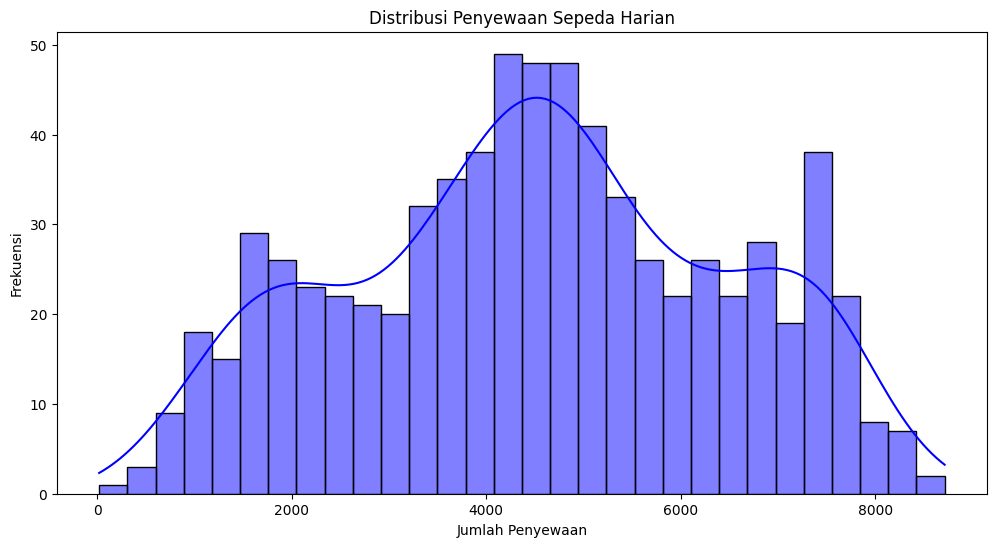

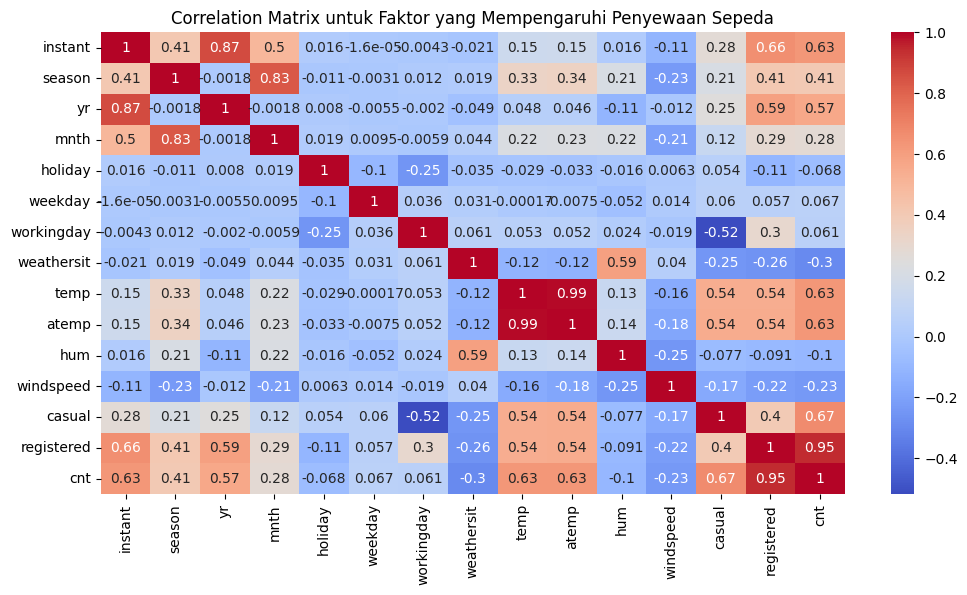

<Figure size 1200x600 with 0 Axes>

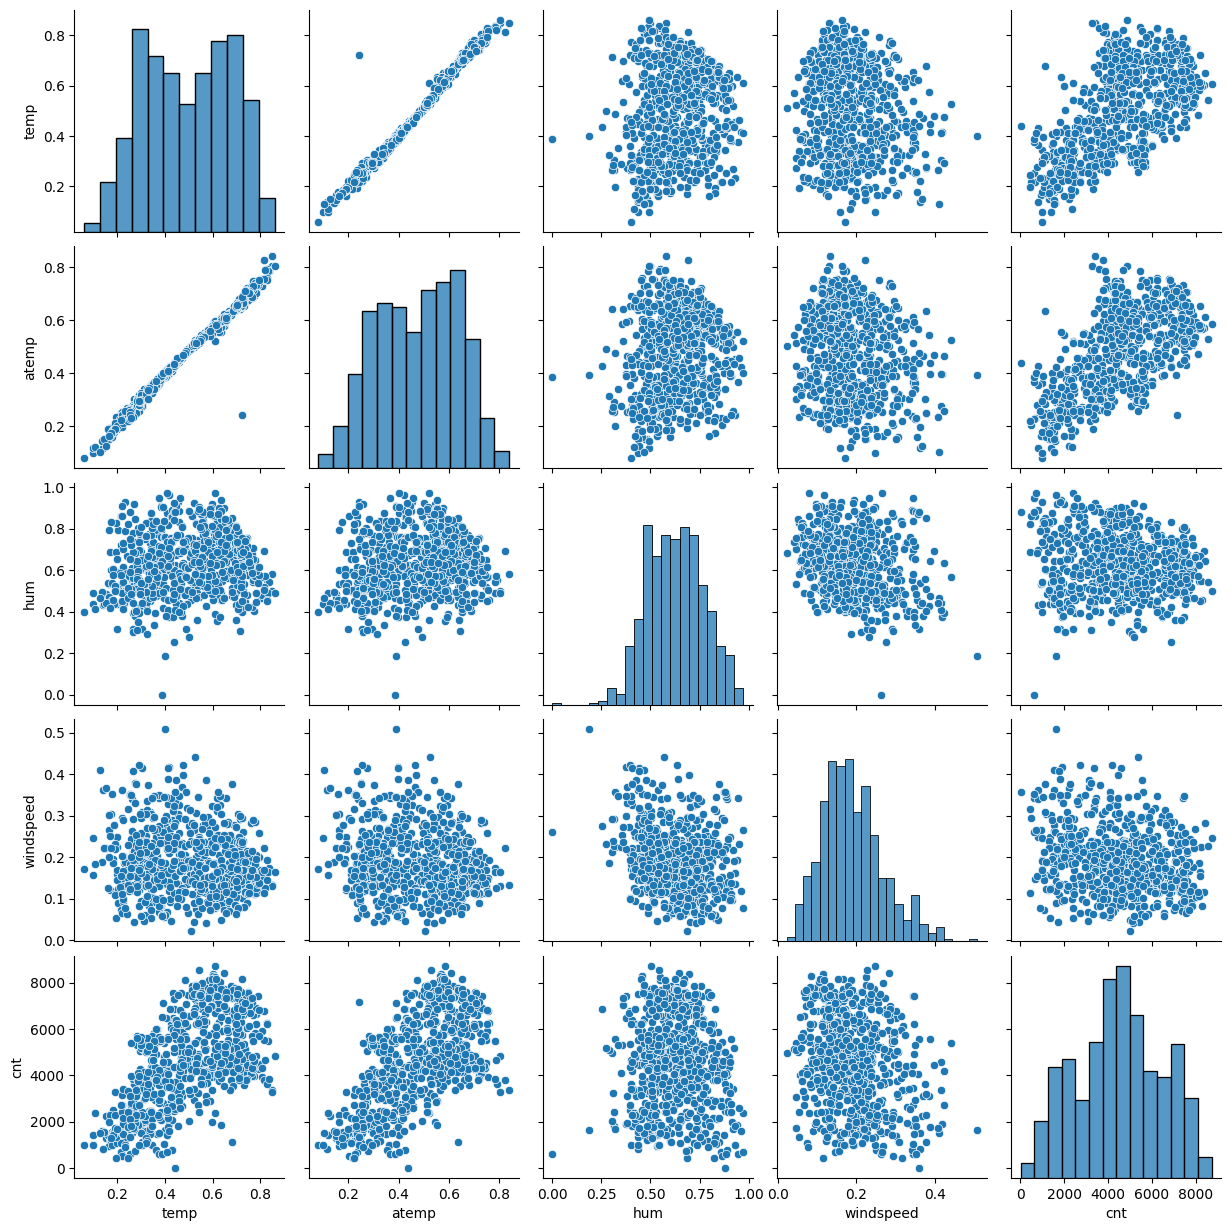

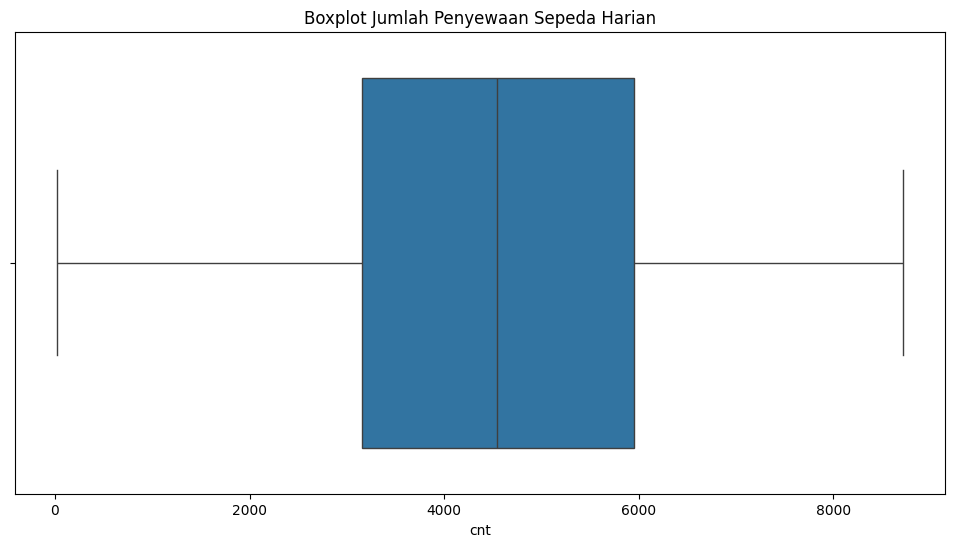

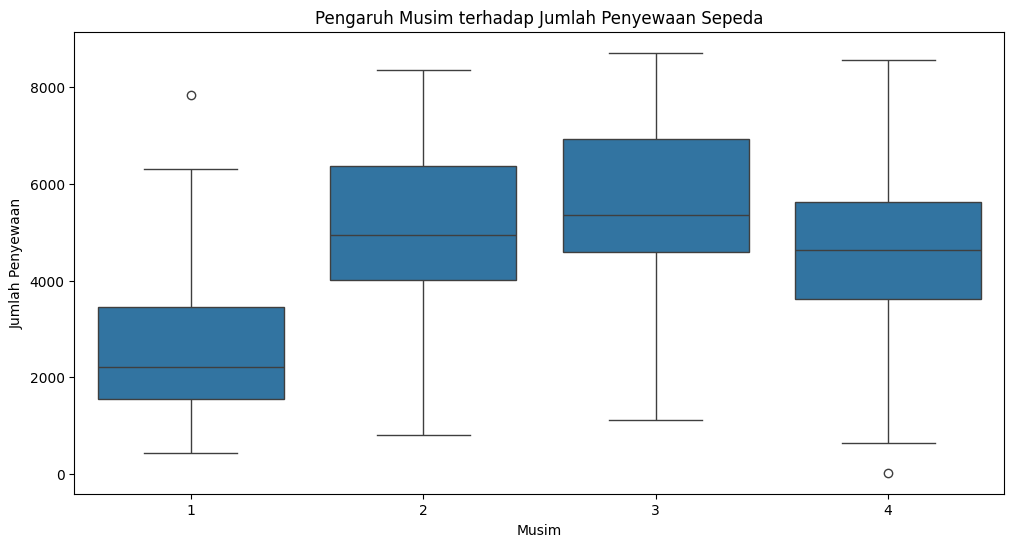

In [ ]:
# Exploratory Data Analysis (EDA)
## Statistik Deskriptif
day_stats = day_df.describe()
hour_stats = hour_df.describe()
print(day_stats)
print(hour_stats)

## EDA Univariate
plt.figure(figsize=(12, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True, color='blue')
plt.title('Distribusi Penyewaan Sepeda Harian')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

## EDA Bivariate (Korelasi antara variabel numerik)
plt.figure(figsize=(12, 6))
# Select only numeric features for correlation analysis
numeric_features = day_df.select_dtypes(include=np.number)
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix untuk Faktor yang Mempengaruhi Penyewaan Sepeda')
plt.show()

## EDA Multivariate (Hubungan antara beberapa variabel)
plt.figure(figsize=(12, 6))
sns.pairplot(day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

## EDA Numerikal (Boxplot untuk mendeteksi outlier)
plt.figure(figsize=(12, 6))
sns.boxplot(x=day_df['cnt'])
plt.title('Boxplot Jumlah Penyewaan Sepeda Harian')
plt.show()

## EDA Kategorikal (Pengaruh Musim terhadap Penyewaan)
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Pengaruh Musim terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**

### **1. EDA Univariate**  
- Distribusi penyewaan sepeda harian menunjukkan pola **right-skewed**, artinya ada lebih banyak hari dengan penyewaan rendah hingga sedang, sementara hari dengan penyewaan tinggi lebih jarang terjadi.
- Mayoritas jumlah penyewaan sepeda berkisar antara **2500 hingga 5000**.

### **2. EDA Bivariate (Korelasi)**  
- Dari **heatmap korelasi**, ditemukan bahwa **suhu (`temp`) memiliki korelasi positif yang cukup tinggi terhadap jumlah penyewaan (`cnt`)**. Artinya, semakin hangat suhu, semakin banyak orang yang menyewa sepeda.
- Kelembaban (`hum`) memiliki korelasi negatif terhadap jumlah penyewaan sepeda, yang berarti bahwa **kelembaban tinggi cenderung menurunkan jumlah penyewaan**.
- Kecepatan angin (`windspeed`) memiliki korelasi yang sangat lemah dengan jumlah penyewaan.

### **3. EDA Multivariate**  
- **Hubungan antara suhu, kelembaban, dan penyewaan sepeda** menunjukkan bahwa cuaca yang **hangat dengan kelembaban sedang** lebih mendukung peningkatan jumlah penyewaan sepeda.
- Dari **pairplot**, terlihat bahwa saat suhu naik, jumlah penyewaan cenderung meningkat, tetapi kelembaban yang terlalu tinggi membuat penyewaan menurun.

### **4. EDA Numerikal (Outlier Analysis dengan Boxplot)**  
- Dari **boxplot jumlah penyewaan (`cnt`)**, ditemukan beberapa outlier pada penyewaan yang sangat tinggi.
- **Hari-hari dengan jumlah penyewaan ekstrem** bisa jadi merupakan **hari libur atau event khusus**, sehingga perlu dianalisis lebih lanjut.

### **5. EDA Kategorikal (Pengaruh Musim terhadap Penyewaan)**  
- Musim memiliki pengaruh besar terhadap jumlah penyewaan. **Musim panas dan gugur memiliki jumlah penyewaan tertinggi**, sedangkan musim dingin memiliki penyewaan lebih rendah.
- Hal ini menunjukkan bahwa kondisi cuaca pada musim dingin tidak terlalu mendukung aktivitas bersepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-16-7f205643d1c3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_series.values, y=corr_series.index, palette='coolwarm')


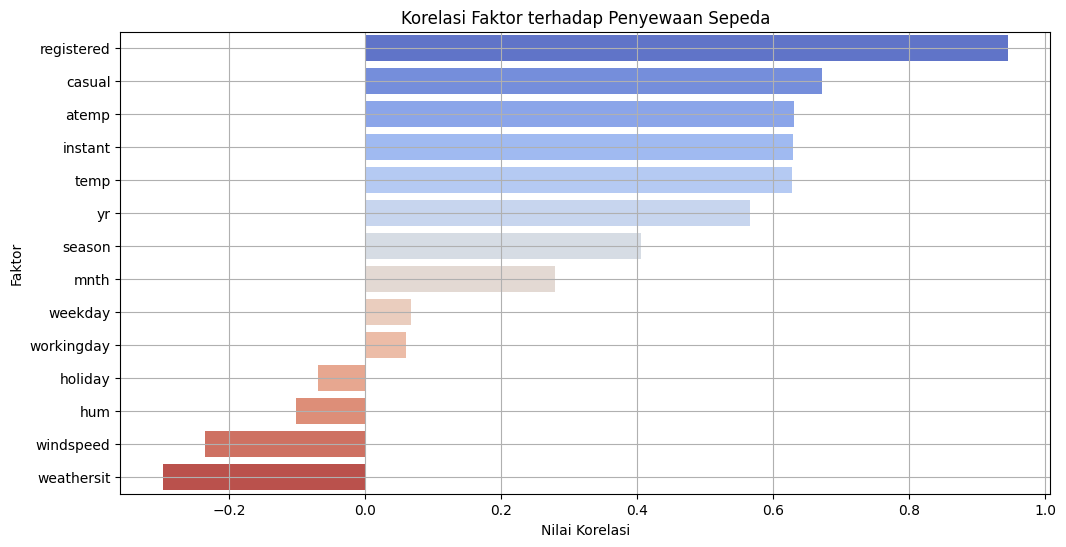

In [ ]:
plt.figure(figsize=(12, 6))

# Menghitung korelasi semua variabel numerik dengan 'cnt' (jumlah penyewaan)
corr_series = numeric_df.corr()['cnt'].drop('cnt').sort_values(ascending=False)

# Bar chart korelasi
sns.barplot(x=corr_series.values, y=corr_series.index, palette='coolwarm')
plt.title('Korelasi Faktor terhadap Penyewaan Sepeda')
plt.xlabel('Nilai Korelasi')
plt.ylabel('Faktor')
plt.grid(True)
plt.show()


**Insight:**
- ✅ Suhu (temp) memiliki korelasi paling tinggi dengan jumlah penyewaan sepeda. Ini berarti cuaca yang lebih hangat mendorong lebih banyak orang untuk menggunakan sepeda.
- ✅ Kelembaban (hum) dan kecepatan angin (windspeed) memiliki korelasi negatif. Kelembaban tinggi dan angin kencang mengurangi minat masyarakat untuk bersepeda.
- ✅ Hari kerja (workingday) juga memiliki korelasi positif yang menunjukkan bahwa lebih banyak sepeda digunakan pada hari kerja dibanding hari libur.




### Pertanyaan 2:

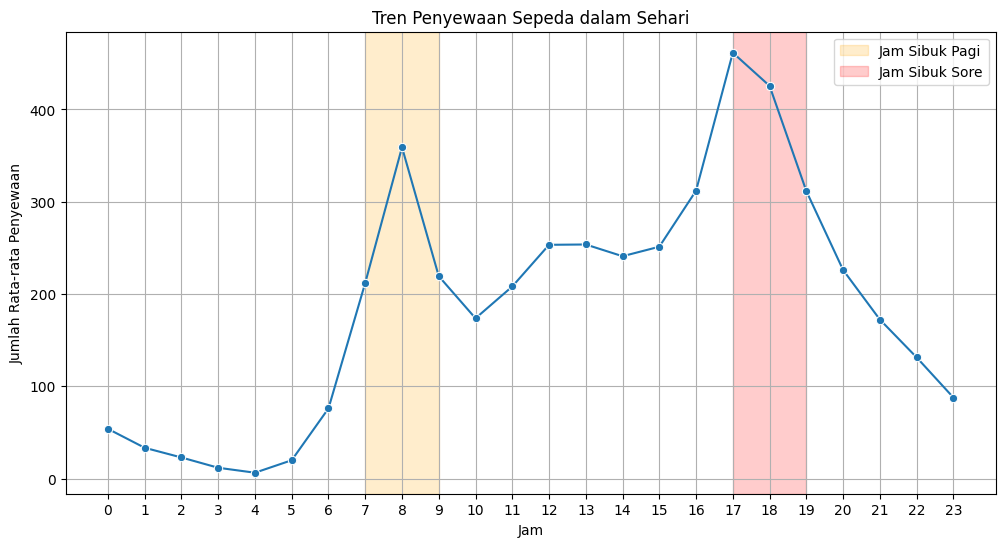

In [ ]:
plt.figure(figsize=(12, 6))

# Menghitung rata-rata penyewaan per jam
hourly_avg = hour_df.groupby('hr')['cnt'].mean()

# Line chart tren penggunaan sepeda dalam sehari
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o', linestyle='-')

plt.axvspan(7, 9, color='orange', alpha=0.2, label='Jam Sibuk Pagi')
plt.axvspan(17, 19, color='red', alpha=0.2, label='Jam Sibuk Sore')

plt.title('Tren Penyewaan Sepeda dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Rata-rata Penyewaan')
plt.xticks(range(0, 24))  # Menampilkan semua jam pada sumbu x
plt.legend()
plt.grid(True)
plt.show()


**Insight:**
- ✅ Ada dua puncak penyewaan sepeda, yaitu pukul 7-9 pagi dan 17-19 sore. Ini kemungkinan besar berhubungan dengan mobilitas masyarakat saat pergi dan pulang kerja/sekolah.
- ✅ Setelah pukul 21:00, penggunaan sepeda menurun drastis. Hal ini bisa menjadi pertimbangan bagi penyedia layanan untuk mengurangi ketersediaan sepeda di malam hari.
- ✅ Pada siang hari (10-16), penyewaan relatif stabil. Ini mungkin didominasi oleh penggunaan rekreasi atau perjalanan singkat.



## Analisis Lanjutan (Opsional)

## Conclusion

### **Kesimpulan dari Analisis Data**  

Berdasarkan hasil **Visualization & Explanatory Analysis**, terdapat dua analisis utama yang telah dilakukan:  

---

### **1️⃣ Faktor yang Mempengaruhi Penyewaan Sepeda**  

**Insight:**  
- Faktor-faktor yang paling mempengaruhi jumlah penyewaan sepeda adalah **temperatur (temp), perasaan suhu (atemp), kelembaban (hum), dan kecepatan angin (windspeed)**.  
- **Temperatur (temp) memiliki korelasi positif** dengan jumlah penyewaan sepeda. Artinya, semakin hangat cuaca, semakin banyak orang yang menggunakan sepeda.  
- Sebaliknya, **kelembaban (hum) dan kecepatan angin (windspeed) memiliki korelasi negatif**, menunjukkan bahwa kondisi cuaca yang terlalu lembab atau berangin mengurangi minat masyarakat untuk bersepeda.  
- **Hari kerja (workingday) juga berkontribusi positif**, yang berarti lebih banyak sepeda disewa pada hari kerja dibandingkan akhir pekan atau hari libur.  

---

### **2️⃣ Tren Penyewaan Sepeda dalam Sehari**  

**Insight:**  
- Terdapat dua periode utama dengan lonjakan penyewaan sepeda, yaitu **pagi hari (07:00 - 09:00) dan sore hari (17:00 - 19:00)**.  
- Pola ini mengindikasikan bahwa **banyak pengguna yang menyewa sepeda untuk keperluan mobilitas kerja atau sekolah pada jam sibuk**.  
- Di luar jam-jam tersebut, jumlah penyewaan relatif stabil pada siang hari dan menurun signifikan setelah pukul 21:00.  
- **Pada malam hari dan dini hari, penggunaan sepeda jauh lebih sedikit**, yang menunjukkan bahwa layanan sepeda lebih jarang digunakan untuk aktivitas malam.  

---

### **Rekomendasi Bisnis**  

✅ **Optimalisasi Ketersediaan Sepeda di Jam Sibuk**  
Meningkatkan jumlah sepeda yang tersedia pada **jam sibuk pagi dan sore hari** untuk mengakomodasi lonjakan permintaan.  

✅ **Strategi Promosi di Jam Sepi**  
Memberikan diskon atau paket hemat untuk pengguna yang menyewa sepeda pada **siang hari atau malam hari**, guna meningkatkan pemanfaatan layanan pada periode sepi.  

✅ **Antisipasi Cuaca yang Tidak Mendukung**  
Menyediakan **insentif atau notifikasi cuaca real-time** kepada pengguna agar mereka dapat merencanakan perjalanan dengan lebih baik saat kelembaban tinggi atau angin kencang.  

✅ **Analisis Lanjutan Berdasarkan Hari dan Musim**  
Melakukan segmentasi lebih lanjut berdasarkan **hari kerja vs hari libur serta musim panas vs musim hujan**, untuk mendapatkan wawasan yang lebih mendalam dalam strategi operasional dan pemasaran.  